# 1. (Sigmoid function)

In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative(x, step):
    return (sigmoid(x+step) - sigmoid(x)) / step


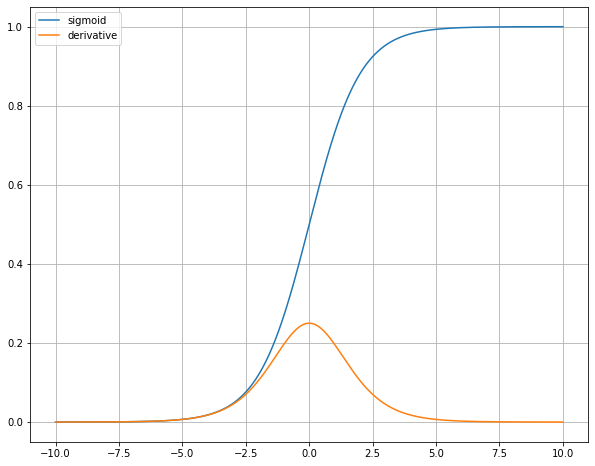

In [142]:
x = np.linspace(-10, 10, 10000)

y1 = sigmoid(x)
y2 = derivative(x, 0.00000001)

plt.plot(x, y1, label='sigmoid')
plt.plot(x, y2, label='derivative')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# 2. (Probability theory)

M = Male,  D = Dercum disease

**Probability of M given D:**

$$
P(M|D) = {P(M \bigcap D) \over P(D)}
$$

*Assume*: 

Total population: 20000 people (male = 10000 men, female = 10000 women)

Dercum disease: male = 25 ($10000*0.25%$) men, female = 500 ($10000*5%$) women

$P(M \bigcap D) = {25 \over 20000}$ 

$P(D) = {525 \over 20000}$

<font color='red'>$\therefore P(M|D) = {{25 \over 20000} \over {525 \over 20000}} = {25 \over 525} = {1 \over 21} \;\;\;\;\;$ This is the probability that the person who has the Dercum disease is male. </font>

# 3. (Gradient descent)

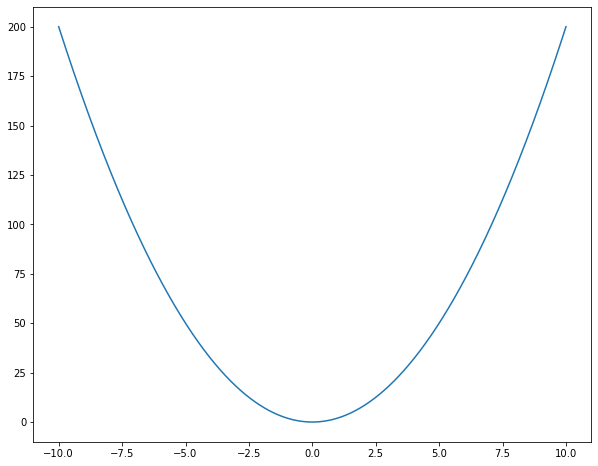

In [341]:
import numpy as np
import matplotlib.pyplot as plt
f_x = lambda x: 2*(x**2)
x = np.linspace(-10,10,1000)
#Plot the curve
plt.plot(x, f_x(x))
plt.show()

In [342]:
f_x_derivative = lambda x: 4*x

def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()

Local minimum occurs at: 0.00
Number of steps:  1000


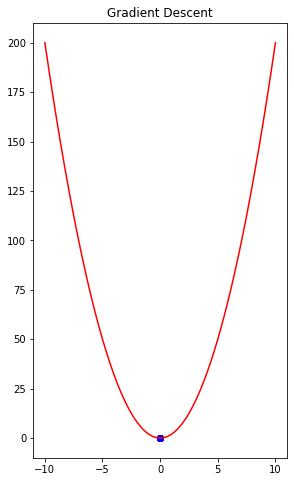

Local minimum occurs at: -0.00
Number of steps:  1000


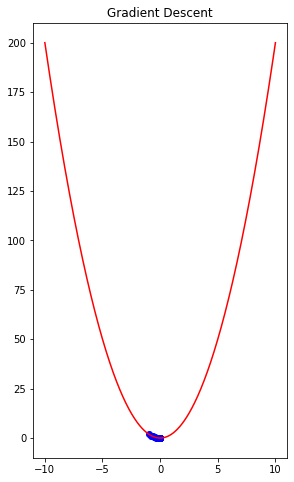

Local minimum occurs at: 0.00
Number of steps:  1000


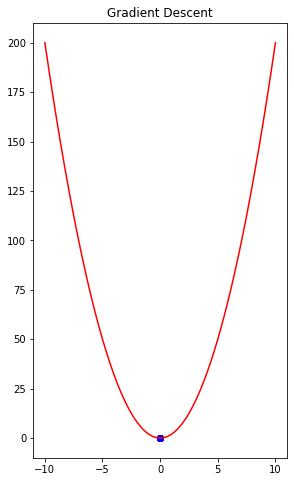

In [344]:
def gradient_iterations(x_start, iterations, learning_rate):
    
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    
    # Keep looping until number of iterations
    for i in range(iterations):
        
        # Get the Slope value from the derivative function for x_start
        x_start_derivative = - f_x_derivative(x_start)  # negative descent is needed (towards minimum)
        
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)        
        
        x_grad.append(x_start)
        y_grad.append(f_x(x_start))
    print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

gradient_iterations(0, 1000, 0.01)
gradient_iterations(-1, 1000, 0.05)
gradient_iterations(0, 1000, 0.01)

Local minimum comes out to be: 0

# 4. (Polynomial curve fitting)

In [31]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
from math import pi,cos,sin,tan,atan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [32]:
x = np.linspace(0, 1, num=100)


In [33]:
y = np.cos(2*pi*x)


In [34]:
gauss = np.random.normal(size=y.size)
z = y+gauss

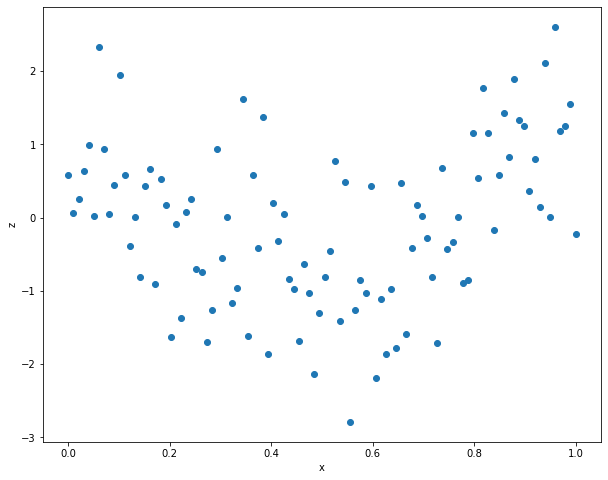

In [35]:
# plot x and z

plt.scatter(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.show()


(80,) (20,) (80,) (20,)
            12             11            10             9             8
-1.207e+06 x  + 6.772e+06 x  - 1.64e+07 x  + 2.239e+07 x - 1.883e+07 x
              7             6             5             4         3
 + 1.001e+07 x - 3.294e+06 x + 6.147e+05 x - 4.909e+04 x - 860.6 x
          2
 + 170.4 x + 9.218 x + 0.3201


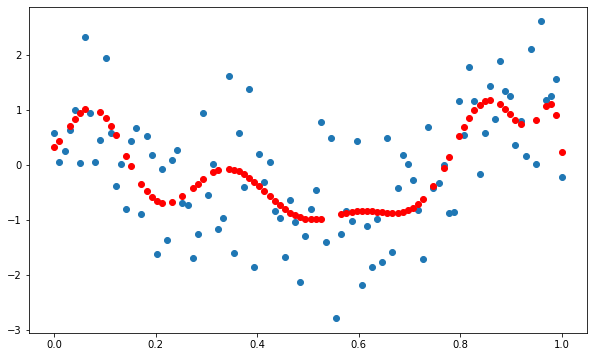

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, z_train.shape, z_test.shape)

poly = PolynomialFeatures(degree=12, include_bias=False)

poly_features = poly.fit_transform(x_train.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, z_train)
z_predicted = poly_reg_model.predict(poly_features)

curve = np.polyfit(x_train, z_train, deg=12)
poly = np.poly1d(curve)
print(poly)

plt.figure(figsize=(10, 6))
plt.scatter(x, z)                           # the original data plotted
plt.scatter(x_train, z_predicted, c="red")  # the fitted data plotted
plt.show()

# plot the fitted data

#fig, ax = plt.subplots()
# plt.plot(x_train, z_train, 'o')
#plt.rcParams["figure.figsize"] = (10, 8)
#ax.scatter(x, z, label='data')
#ax.plot(np.polyval(curve, x_train), label='fit')
#ax.legend()
#plt.xlim(-0.1, 1.1)
#plt.ylim(-3,3)
#plt.xlabel('x_train')
#plt.ylabel('z_train')
#plt.show()

[0.0, 1.5407439555097887e-33, 0.40029710912919336, 0.6963995695870387, 0.7963838591726927, 0.8716503395841407, 1.1976125455329434, 1.11695197707132, 1.024358167002456, 0.9219294003284547, 0.8437400088089695, 1.0941009415007736, 1.2957778421924786, 1.3576557168236907, 1.4136037330936366, 1.3366808440366453, 1.2760439088221145, 1.3240799707842623, 1.3062321230677327, 1.2693712794927765, 1.2290501690313882, 1.1749926984161192, 1.1274402413155682, 1.0875428933055464, 1.1424292085110728, 1.1594994777395367, 1.1384304526305586, 1.1044278078524405, 1.1878120082175172, 1.176482539391364, 1.1409301775864935, 1.1677918651557233, 1.1476250490291817, 1.1373530352805175, 1.1299920955159664, 1.1220624647104378, 1.1399265055041499, 1.1150579350554863, 1.0875324951995422, 1.0677457339122942, 1.0705901760916232, 1.0494664469503627, 1.0268257412202508, 1.003514414911406, 0.9818105342185055, 0.9698122051348873, 0.9634104636620678, 0.9456806304895413, 0.9317610985171569, 0.9184054125641182, 0.902868474324

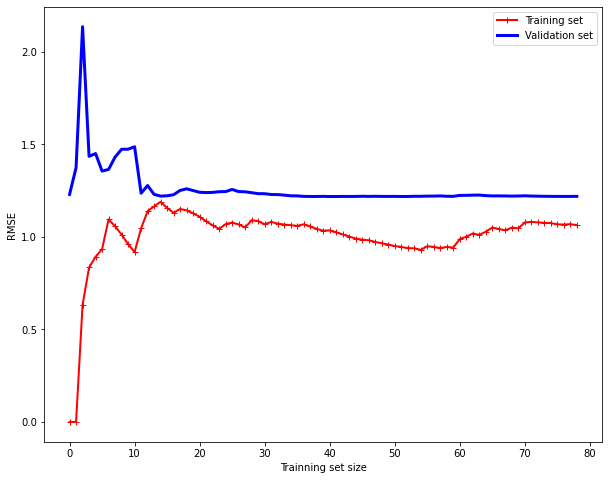

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, z):
    x_train, x_val, z_train, z_val = train_test_split(x, z, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m].reshape(-1, 1), z_train[:m].reshape(-1, 1))
        z_train_predict = model.predict(x_train[:m].reshape(-1, 1))
        z_val_predict = model.predict(x_val.reshape(-1, 1))
        train_errors.append(mean_squared_error(z_train[:m], z_train_predict))
        val_errors.append(mean_squared_error(z_val, z_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.xlabel('Trainning set size')
    plt.ylabel('RMSE')
    plt.legend()
    print(train_errors)
    print(val_errors)

plot_learning_curves(LinearRegression(), x, z)
    
    

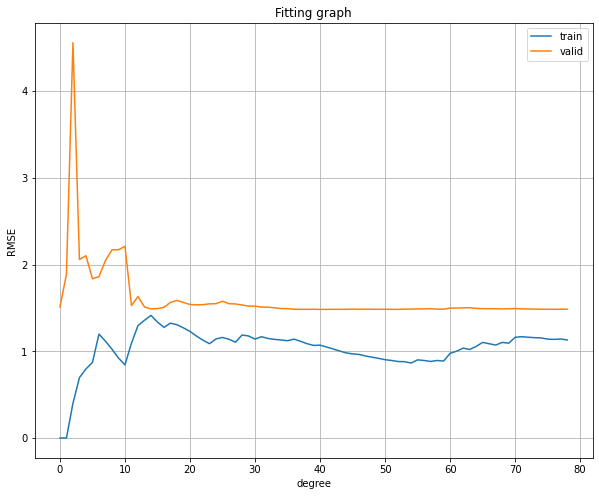

In [133]:
import tqdm 

rmse_train = [0.0, 1.5407439555097887e-33, 0.40029710912919336, 0.6963995695870387, 0.7963838591726927, 0.8716503395841407, 1.1976125455329434, 1.11695197707132, 1.024358167002456, 0.9219294003284547, 0.8437400088089695, 1.0941009415007736, 1.2957778421924786, 1.3576557168236907, 1.4136037330936366, 1.3366808440366453, 1.2760439088221145, 1.3240799707842623, 1.3062321230677327, 1.2693712794927765, 1.2290501690313882, 1.1749926984161192, 1.1274402413155682, 1.0875428933055464, 1.1424292085110728, 1.1594994777395367, 1.1384304526305586, 1.1044278078524405, 1.1878120082175172, 1.176482539391364, 1.1409301775864935, 1.1677918651557233, 1.1476250490291817, 1.1373530352805175, 1.1299920955159664, 1.1220624647104378, 1.1399265055041499, 1.1150579350554863, 1.0875324951995422, 1.0677457339122942, 1.0705901760916232, 1.0494664469503627, 1.0268257412202508, 1.003514414911406, 0.9818105342185055, 0.9698122051348873, 0.9634104636620678, 0.9456806304895413, 0.9317610985171569, 0.9184054125641182, 0.9028684743241342, 0.894151240096061, 0.8819425618545734, 0.8800124173839672, 0.8645870507774521, 0.9011442113033564, 0.8939698986948333, 0.8827034354431381, 0.8937943696712183, 0.887563301582042, 0.9770532204810526, 1.0011248104139636, 1.036287145493094, 1.0210885631304243, 1.056085758714041, 1.1025618628085212, 1.0869895077209315, 1.0716343495551195, 1.102239703986236, 1.093153524573865, 1.1615471868728997, 1.1681201608542422, 1.1619620735462475, 1.156984628037939, 1.153936801146734, 1.1399863726652633, 1.1372197150979382, 1.1419190503569272, 1.130128480052521]
rmse_valid = [1.510332412347704, 1.8864723897532243, 4.557452644749477, 2.0584776965137785, 2.1014849044787636, 1.8362793666067845, 1.8606770689614087, 2.0470519061926593, 2.1694352362255125, 2.170467027932906, 2.2095245448841214, 1.5267155378417225, 1.6312340079224819, 1.5110945013978125, 1.4884323288886416, 1.492370771222319, 1.5065720435634635, 1.564181133285767, 1.5859753146738211, 1.5624287828239225, 1.539190350878175, 1.535073266040969, 1.5375546239552924, 1.5468386077615963, 1.5486956322464611, 1.577392369411703, 1.5484944349435306, 1.5457755338266224, 1.5335819422877441, 1.5208318583085918, 1.5201625222460542, 1.5092986515870943, 1.5084873004896417, 1.5014111151179388, 1.4923906995487823, 1.4914536658969688, 1.4847765987916584, 1.4834944082109511, 1.483623692066736, 1.4848015375939196, 1.4827962748043466, 1.4832456574117638, 1.483828825173339, 1.4838249741916, 1.4840636399678628, 1.486275619845883, 1.4844030658578447, 1.4858192978711264, 1.4845648956742432, 1.4842761039154313, 1.4846004788039353, 1.4832698871663694, 1.4834476667328278, 1.4859449497490846, 1.4859831021169794, 1.4881578212732525, 1.4885098928267853, 1.4910270941754127, 1.4862609446824768, 1.4853787618171457, 1.497649496928154, 1.498433144066113, 1.5008899684831731, 1.5019628370952307, 1.4948071606505067, 1.4909918447813755, 1.4911045475415443, 1.490310250120913, 1.4881872603549462, 1.4897798780415306, 1.4923875428191367, 1.4891683511080611, 1.487396859685192, 1.4858692790751242, 1.484712089262897, 1.4844663152852786, 1.4838820616108725, 1.484441169628105, 1.4850149259870038]
degrees = list(range(0, 79))


    
def plot_fitting_graph(x, metric_train, metric_valid, metric_name='metric', xlabel='x', yscale='linear'):
    plt.plot(x, metric_train, label='train')
    plt.plot(x, metric_valid, label='valid')
    plt.yscale(yscale)
    plt.title('Fitting graph')
    plt.ylabel(metric_name)
    plt.xlabel(xlabel)
    plt.legend(loc='best')
    plt.grid(True)
    
plot_fitting_graph(degrees, rmse_train, rmse_valid, metric_name='RMSE', xlabel='degree') 

# Overfitting happens when the fit for the training data gets even better, but the fit for the validation set gets worse.
# Therefore, we might need to keep digging into more degrees in order to find out where overfitting occurs.  

In [17]:
# Ridge regularization method
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


rr = Ridge(alpha=0.01)                                    # instantiates the Ridge Regression model with an alpha value of 0.01
rr.fit(x_train.reshape(-1, 1), z_train.reshape(-1, 1))    #  fits the model to the training data
pred_train_rr= rr.predict(x_train.reshape(-1, 1))
print('On the training set:')
print('RMSE = ', np.sqrt(mean_squared_error(z_train,pred_train_rr))) # the evaluation metrics - RMSE and R-squared
print('R^2 = ', r2_score(z_train, pred_train_rr))
print()
pred_test_rr= rr.predict(x_test.reshape(-1, 1))
print('On the test dataset:')
print('RMSE = ', np.sqrt(mean_squared_error(z_test,pred_test_rr))) 
print('R^2 = ', r2_score(z_test, pred_test_rr))



On the training set:
RMSE =  1.1007598620387302
R^2 =  0.010219095221767782

On the test dataset:
RMSE =  1.259048484288947
R^2 =  -0.39999822890012005


In [18]:
# Lasso regularization method

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train.reshape(-1, 1), z_train.reshape(-1, 1)) 
pred_train_lasso= model_lasso.predict(x_train.reshape(-1, 1))
print('On the training set:')
print('RMSE = ', np.sqrt(mean_squared_error(z_train,pred_train_lasso)))
print('R^2 = ', r2_score(z_train, pred_train_lasso))
print()
pred_test_lasso= model_lasso.predict(x_test.reshape(-1, 1))
print('On the test dataset:')
print('RMSE = ', np.sqrt(mean_squared_error(z_test,pred_test_lasso))) 
print('R^2 = ', r2_score(z_test, pred_test_lasso))

# The most ideal result sould be an RMSE value of zero and R-squared value of 1

On the training set:
RMSE =  1.1013227209421592
R^2 =  0.009206613846784784

On the test dataset:
RMSE =  1.2535473418508813
R^2 =  -0.3877909715250272


# 5. (Linear regression)

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [147]:
data = pd.read_csv(r"C:\Users\Hsiao-ping.ni\OneDrive\Arizona State University\PhD in Mechanical Engineering\Courses\Fall 2022\MAE 551 - Applied Machine Learning for Mechanical and Aerospace Engineers\MAE551_HW\HW1_P5_weatherHistory.csv") 
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [148]:
# choose the two column: humidity and temperature

x = data['Humidity'].values.reshape(-1, 1)
y = data['Temperature (C)'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)



In [149]:
# training a linear regression model

regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root mean squared error: ', MSE)
print('R2 Score:', r2)
print('Intercept:', regressor.intercept_)
print('Slope:', regressor.coef_)


Root mean squared error:  54.92955871237103
R2 Score: 0.39404410246406896
Intercept: [34.68198576]
Slope: [[-30.96039872]]


In [150]:
# 3-fold cross validation (the data will be split into 3 folds)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, x_train, y_train, scoring='r2', cv=3)
print(scores)
print("Mean 3-Fold R Squared: {}".format(np.mean(scores)))

# the result of R^2 here is close to the one above, so it seems that there is no big difference between the predicted 
# R-squared value and the regular R-squared value. Therefore, there might not be a good chance to have the model that is 
# overfitting in this case.


[0.40327086 0.39914856 0.40093252]
Mean 3-Fold R Squared: 0.4011173153585726


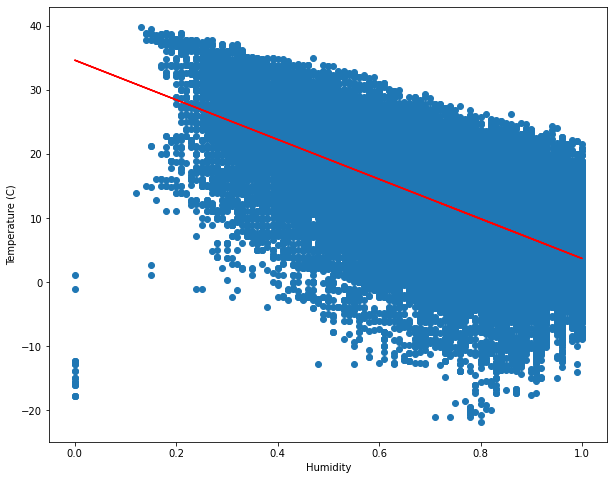

In [151]:
# data points
plt.plot(x, y, 'o')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

# predicted values
plt.plot(x_test, y_pred, color='r')
plt.show()


0 0.15177726996568278 0.2386535687502376
200 2.02734589130842 9.812844254268459
400 -1.0490275899308934 12.150576925096779
600 -3.8457729528531672 14.25775823614265
800 -6.38045541610883 16.167458111169136
1000 -8.677616827378662 17.89820299688042
1200 -10.759514880011071 19.466762519621135
1400 -12.646321562459981 20.888334813030735
1600 -14.356318578131443 22.176693817640885
1800 -15.906074480951377 23.344322739824573
2000 -17.31060521189079 24.402535004450606
2200 -18.583519591867425 25.361583873256198
2400 -19.737151180738103 26.230761791055446
2600 -20.78267777999355 27.018490422371947
2800 -21.730229737044834 27.732402250880963
3000 -22.588988100486887 28.379414532297375
3200 -23.367273577387397 28.965796317255254
3400 -24.07262715452915 29.497229193579734
3600 -24.711883164763407 29.978862336496682
3800 -25.2912355064309 30.415362400174402
4000 -25.816297657465814 30.810958734007873
4200 -26.292157065673123 31.169484361756762
4400 -26.723424442179102 31.494413120593162
4600 -27.

(-30.871703353775505, 34.61984108357181)

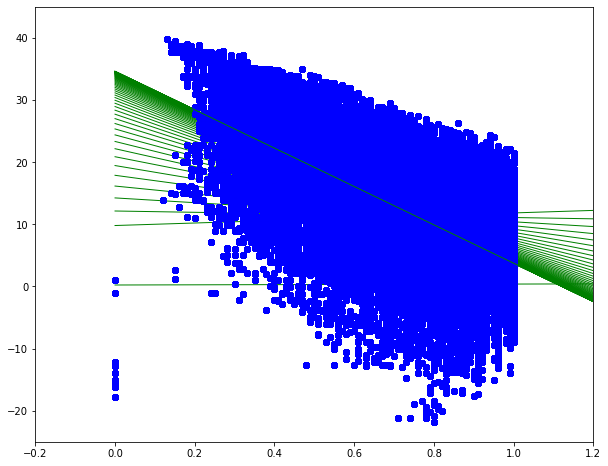

In [152]:
# training by gradient descent

def getGradient(x, y, weight, bias = 0):
    weight_loss = x * (x * weight + bias - y)
    bias_loss = (x * weight + bias - y)
    weight_gradient = 2 * np.average(weight_loss)
    bias_gradient = 2 * np.average(bias_loss)
    return (weight_gradient, bias_gradient)


def trainByGradientDescent(x, y):
    weight = 0
    bias = 0
    learningRate = 0.01       # this value of learning rate can be modified for optimizing the result. When the learning rate
                              # is tested with different values, different effect can be noticed. 
                              # The value 0.01 seems to be appropriate here.
            
    for i in range(15000):
        (weight_gradient, bias_gradient) = getGradient(x, y, weight, bias)
        weight -= weight_gradient * learningRate
        bias -= bias_gradient * learningRate

        if i % 200 == 0:
            plt.plot(x, y, "bo")
            plt.xlim(-0.2, 1.2)
            plt.ylim(-25, 45)
            image = plt.plot(
                [0, 10], 
                [0 + bias, 10 * weight + bias], 
                linewidth = 1.0, 
                color = "g")
            image.append(image)
            print(i, weight, bias)

        if weight_gradient == 0 and bias_gradient == 0:
            return (weight, bias)

    return (weight, bias)

trainByGradientDescent(x, y)

# The result here is very close to the one shown above (-30.96039872, 34.68198576).
# The plot clearly displays that the model is converged very well to an optimal solution.

# 6. (Logistic regression)

In [233]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from statistics import mean
import statistics
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


dataset = pd.read_csv(r"C:\Users\Hsiao-ping.ni\OneDrive\Arizona State University\PhD in Mechanical Engineering\Courses\Fall 2022\MAE 551 - Applied Machine Learning for Mechanical and Aerospace Engineers\MAE551_HW\HW1_P6_candy-data.csv") 
dataset


,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,0.732,0.860,66.971725
1,3 Musketeers,0.604,0.511,67.602936
2,One dime,0.011,0.116,32.261086
3,One quarter,0.011,0.511,46.116505
4,Air Heads,0.906,0.511,52.341465
...,...,...,...,...
80,Twizzlers,0.220,0.116,45.466282
81,Warheads,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0.186,0.267,41.904308


In [234]:
# change to categorical values

def probability(percent):
    if percent >= 50:
        return 1   # popular
    else:
        return 0   # not popular
    
dataset['winpercent'] = dataset['winpercent'].apply(lambda x: probability(x)) 
dataset


,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,0.732,0.860,1
1,3 Musketeers,0.604,0.511,1
2,One dime,0.011,0.116,0
3,One quarter,0.011,0.511,0
4,Air Heads,0.906,0.511,1
...,...,...,...,...
80,Twizzlers,0.220,0.116,0
81,Warheads,0.093,0.116,0
82,WelchÕs Fruit Snacks,0.313,0.313,0
83,WertherÕs Original Caramel,0.186,0.267,0


In [291]:
#split dataset in features and target variable

feature_cols = ['sugarpercent', 'pricepercent']


x = dataset[feature_cols] # Features
y = dataset['winpercent']    # Target variable

print(x)
print(y)


    sugarpercent  pricepercent
0          0.732         0.860
1          0.604         0.511
2          0.011         0.116
3          0.011         0.511
4          0.906         0.511
..           ...           ...
80         0.220         0.116
81         0.093         0.116
82         0.313         0.313
83         0.186         0.267
84         0.872         0.848

[85 rows x 2 columns]
0     1
1     1
2     0
3     0
4     1
     ..
80    0
81    0
82    0
83    0
84    0
Name: winpercent, Length: 85, dtype: int64


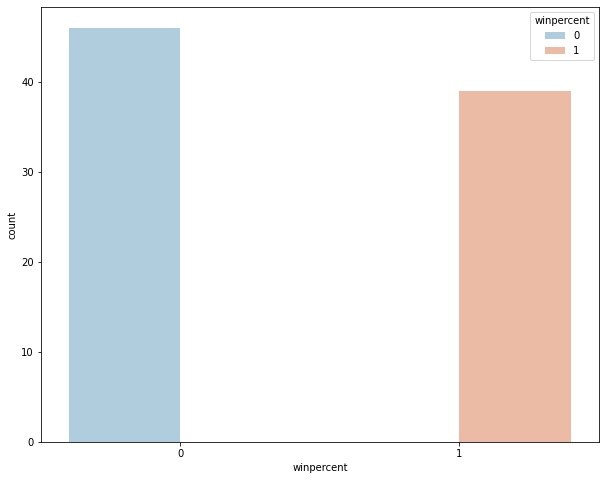

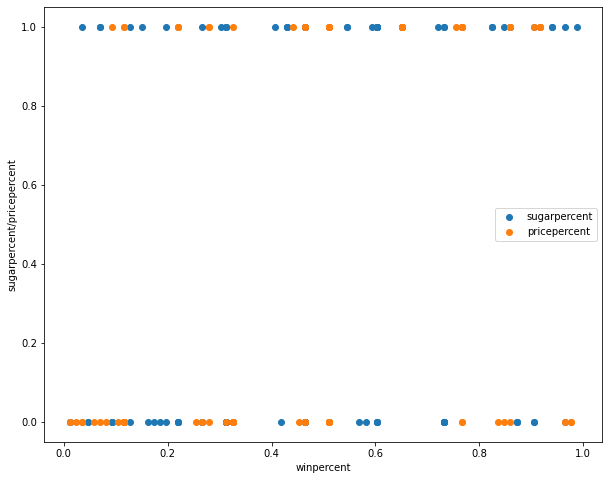

In [292]:
# plot

sns.countplot(x='winpercent', hue='winpercent', data=dataset, palette='RdBu_r')
plt.show()

plt.scatter(x='sugarpercent', y='winpercent' ,data=dataset, label="sugarpercent")
plt.scatter(x='pricepercent', y='winpercent' ,data=dataset, label="pricepercent")
plt.xlabel('winpercent')
plt.ylabel('sugarpercent/pricepercent')
plt.legend()


In [293]:
# split X and y into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [305]:
# instantiate the model 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

logreg = LogisticRegression(solver='liblinear') 

# fit the model with data
logreg.fit(x_train, y_train)

# predicting
y_pred = logreg.predict(x_test)
print(y_pred)    # 22 testing data points


[0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1]


In [247]:
# evaluate the model and collect the scores with 3-fold cross validation

n_scores = cross_val_score(logreg, x_train, y_train, scoring='r2', cv=3)
print(n_scores)
print("Mean 3-Fold R Squared: {}".format(np.mean(n_scores)))  # report the model performance for training dataset

# R^2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
print()

# obtain the accuracy
train = logreg.score(x_train, y_train)
test = logreg.score(x_test, y_test)
print('training set accuracy', train)
print('testing set accuracy', test)

#  In this case, training set accuracy which is much higher might indicate "overfitting"


[ 0.04545455 -0.52727273 -0.33636364]
Mean 3-Fold R Squared: -0.272727272727273

training set accuracy 0.6984126984126984
testing set accuracy 0.6363636363636364
